In [1]:
# Importamos las librerías necesarias
%matplotlib inline
import pandas as pd

In [2]:
# Cargamos el dataset
df_gastos = pd.read_csv('../Data/gastos_abril_2023.csv')

In [3]:
df_gastos.head()

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET
0,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FB1350335-183011-629,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1025821.0,2023-04-05,1054.76,GTS VARIOS
1,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FZ5209887-183011-623,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1025821.0,2023-04-05,16090.79,GTS VARIOS
2,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FZ5211984-183011-621,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1025821.0,2023-04-05,190872.18,GTS VARIOS
3,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FZ5211985-183011-622,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1025821.0,2023-04-05,174102.14,GTS VARIOS
4,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FB1366036-183011-739,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1025926.0,2023-04-21,1054.76,GTS VARIOS


## Visión general de los datos

In [4]:
df_gastos.columns

Index(['C B', 'BENEFICIARIO', 'RFC', 'FACTURAS', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO - #OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [5]:
df_gastos.dtypes

C B               int64
BENEFICIARIO     object
RFC              object
FACTURAS         object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO - #OP       float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [6]:
df_gastos.describe()

,C B,FDO - #OP,IMPORTE
count,943.000000,9.430000e+02,9.430000e+02
mean,236730.374337,1.245578e+08,4.871657e+05
std,87031.504011,1.664054e+08,1.937625e+06
min,110036.000000,1.025775e+06,2.224000e+01
25%,123798.500000,1.025908e+06,4.238465e+03
50%,214873.000000,1.026005e+06,2.243605e+04
75%,320050.000000,3.440001e+08,1.547427e+05
max,656408.000000,6.040001e+08,2.834583e+07


In [7]:
# Seleccionamos las variables de interés
df_gastos = df_gastos[['BENEFICIARIO', 'FACTURAS', 'CONTRATO', 'CONCEPTO', 'TIPO', 'FDO - #OP', 'FECHA', 'IMPORTE', 'SHEET']]

## Análisis unidimensional de las variables

In [8]:
df_gastos['SHEET'].value_counts()

GTS VARIOS                     408
OBRA PUBLICA Y GV FDOS. ESP    380
SERV PERS                      116
COMUNIC                         25
SERV PROF                       12
GTS REPRE                        2
Name: SHEET, dtype: int64

In [9]:
df_gastos['CONCEPTO'].value_counts()

DESCUENTO SOBRE NÓMINA CORRESPONDIENTE A LA PRIMERA QUINCENA DEL MES 4 Y AÑO 2023                                                  13
DESCUENTO SOBRE NÓMINA CORRESPONDIENTE A LA SEGUNDA QUINCENA DEL MES 4 Y AÑO 2023                                                  13
DESCUENTO SOBRE NÓMINA CORRESPONDIENTE A LA SEGUNDA QUINCENA DEL MES 3 Y AÑO 2023                                                  12
CAJA CHICA MARZO                                                                                                                    8
FONDO OPERATIVO MARZO                                                                                                               7
                                                                                                                                   ..
REMODELACIÓN Y/O ADECUACIÓN EDIFICIO HIDALGO DE LA CONTRALORIA                                                                      1
SUMINISTRO DE INSUMOS MEDICOS PARA LOS CENTROS DE SALUD MUNICI

In [10]:
df_gastos['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION                          128
SERVICIOS ESPECIALIZADOS EN MANTENIMIENTO E INFRAESTRUCTURA S.A. DE C.V.     38
DILOI, S.A. DE C.V.                                                          19
SUNSHINE BODY SHOP, S.A. DE C.V.                                             14
SECRETARIA DE FINANZAS Y TESORERIA GRAL DEL EDO DE NL                        13
RTW, S.A. DE C.V.                                                            13
AUTO ELECTRICA DEL NORTE, S.A. DE C.V.                                       13
MUNICIPIO DE LA CIUDAD DE MONTERREY                                          12
CFE SUMINISTRADOR DE SERVICIOS BASICOS                                       12
HISA FARMACEUTICA, S.A. DE C.V.                                              12
Name: BENEFICIARIO, dtype: int64

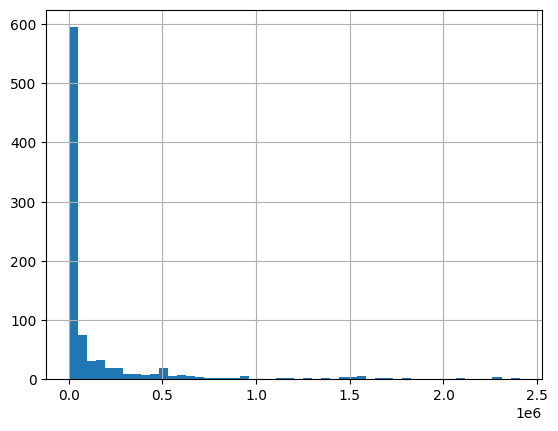

In [11]:
# histograma de los importes que se encuentran por debajo del percentil 95
df_gastos[df_gastos['IMPORTE'] < df_gastos['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50);

## Análisis multidimensional de las variables

In [12]:
# Obtenemos la suma de los importes por beneficiario
sum_importe_beneficiario = df_gastos.groupby('BENEFICIARIO').sum(numeric_only=True)['IMPORTE']

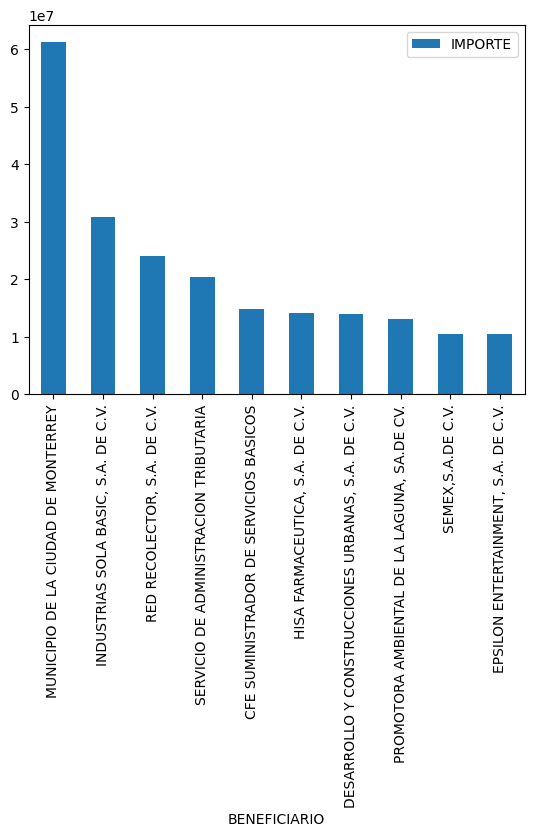

In [13]:
# Creamos un barplot con los 10 beneficiarios con mayor importe ordenados de mayor a menor
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False)[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE');

In [14]:
# Promedio por hoja
mean_importe_sheet = df_gastos.groupby('SHEET').mean(numeric_only=True)['IMPORTE']

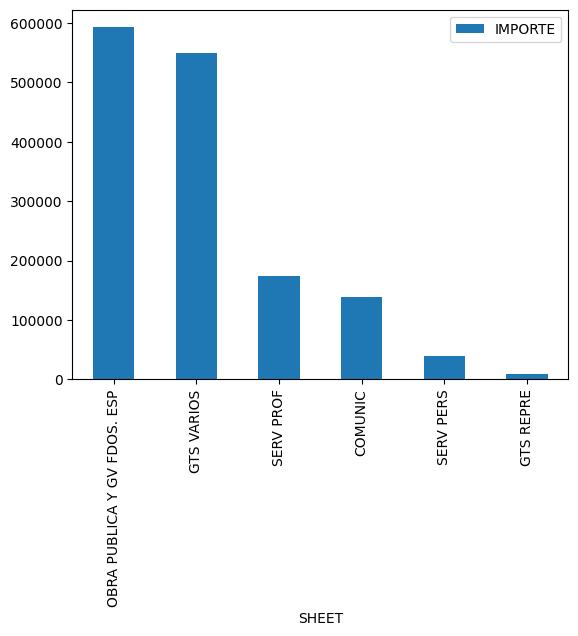

In [15]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False)[0:10].plot(kind='bar', x='SHEET', y='IMPORTE');

In [16]:
# Suma de los importes por fecha
sum_importe_fecha = df_gastos.groupby('FECHA').sum(numeric_only=True)['IMPORTE']

In [17]:
sum_importe_fecha.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,FECHA,IMPORTE
2,2023-04-05,89915987.01
15,2023-04-28,85342600.30
11,2023-04-21,72866868.42
14,2023-04-27,69393003.67
6,2023-04-14,56539954.14
1,2023-04-04,33151760.90
7,2023-04-17,31756397.59
3,2023-04-11,13113777.82
0,2023-04-03,3694022.58
8,2023-04-18,1457354.86


In [18]:
# Agrupando por beneficiario y hoja
df_gastos.groupby(['BENEFICIARIO', 'SHEET']).sum(numeric_only=True)['IMPORTE']

BENEFICIARIO                                         SHEET                      
A&T IMPORTACIONES, S.A. DE C.V.                      GTS VARIOS                      353808.40
ABUNDIS  ALBERTO                                     SERV PROF                        66113.12
ACOPIADORA COMERCIAL Y AGROINDUSTRIAL, S.A. DE C.V.  GTS VARIOS                      161853.64
                                                     OBRA PUBLICA Y GV FDOS. ESP      68349.89
ADQUISICIONES INTELIGENTES, S.A. DE C.V.             GTS VARIOS                      442540.00
                                                                                       ...    
VAZQUEZ MENDOZA JAQUELIN ANDERE                      SERV PERS                         6100.94
VELAZQUEZ MARTINEZ OSCAR ROSENDO                     GTS VARIOS                       24667.40
VG MAYOREO DE MONTERREY, S.A. DE C.V.                OBRA PUBLICA Y GV FDOS. ESP    2016323.60
YACARE MEXICO, S.A. DE C.V.                          OBRA PUBLIC

In [19]:
gastos_sheet_beneficiario = df_gastos.groupby(['BENEFICIARIO', 'SHEET']).sum(numeric_only=True)['IMPORTE'].sort_values(ascending=False).unstack('SHEET')

In [20]:
# top 10 de los beneficiarios
top_beneficiarios = df_gastos.groupby('BENEFICIARIO')['IMPORTE'].sum(numeric_only=True).sort_values(ascending=False).index[0:10]

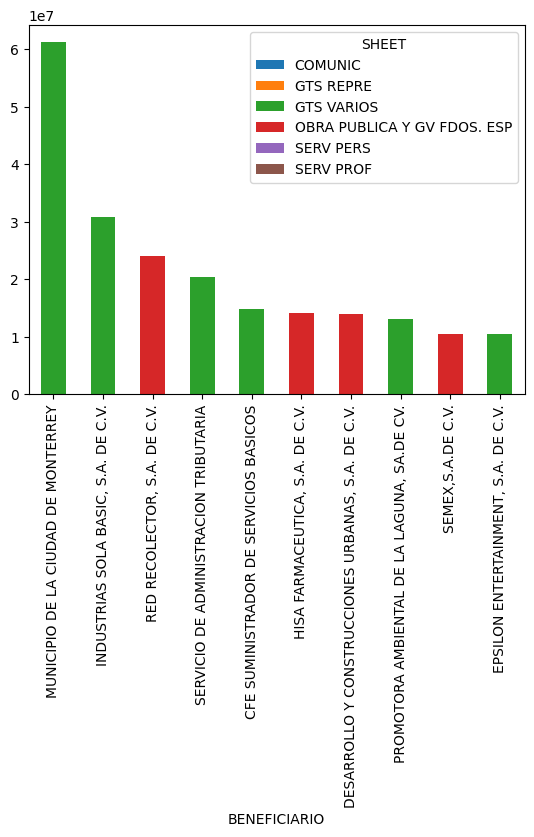

In [21]:
# Graficamos los 10 beneficiarios con mayor importe indicando el importe por hoja
gastos_sheet_beneficiario.loc[top_beneficiarios].plot(kind='bar', stacked=True); # stacked=True para que se apilen las barras

In [22]:
# Generando reportes de manera automática utilizando ydata_profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df_gastos, title='Reporte de gastos', explorative=True)

In [24]:
profile.to_widgets()

## Análisis de texto

In [27]:
import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [28]:
textos_gastos = ''

for concepto in df_gastos['CONCEPTO']:
    textos_gastos = textos_gastos + ' ' + concepto

In [29]:
stopwords_list = stopwords.words('spanish') + ['2022','2023', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom', 'sis', '2022est', '2023est', 'rp']


In [30]:
textos_gastos = ' '.join([word for word in textos_gastos.strip().lower().split(' ') if word not in stopwords_list and len(word) > 4])

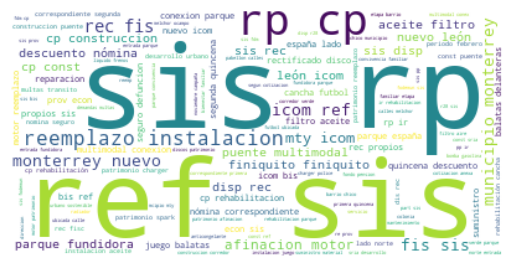

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white')
wc.generate(textos_gastos)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear');